<a href="https://colab.research.google.com/github/totti0223/deep_learning_for_biologists_with_keras/blob/master/notebooks/flower_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#17 flowers dataset classification

![17_flowers](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/categories.jpg =300x600)

## Library Import

In [0]:
import os
import shutil
from more_itertools import chunked
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import keras
from keras.utils.data_utils import get_file
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

##Dataset Preparation

### Download

In [2]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
!tar -zxf 17flowers.tgz

--2019-01-15 09:38:42--  http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/x-gzip]
Saving to: ‘17flowers.tgz.2’

17flowers.tgz.2     100%[===================>]  57.48M  11.0MB/s    in 6.6s    

2019-01-15 09:38:50 (8.64 MB/s) - ‘17flowers.tgz.2’ saved [60270631/60270631]



In [3]:
#get list of files
_files = os.listdir("jpg")
#jpg only
_files = sorted([x for x in _files if x.endswith(".jpg")])

#to groups of 80
grouped_files = list(chunked(_files,80))

#create parent directory
parent_dir = "image"
if os.path.exists(parent_dir) == False:
    os.mkdir(parent_dir)
    
#create subfolder
labels = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']
print ("creating data for: ",labels)
for label in labels:
    subfolder = os.path.join(parent_dir,label)
    if os.path.exists(subfolder) == False:
        os.mkdir(subfolder)
#copy files to subfolders
for i,files in enumerate(grouped_files):
    for file in files:
        orig = os.path.join("jpg",file)
        dest = os.path.join(parent_dir,labels[i],file)
        shutil.copy2(orig,dest)

creating data for:  ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']


In [4]:
# here is how the organized folder look like.
for root, dirs, files in os.walk("image"):
    print(root)
    print(files)

image
[]
image/Bluebell
['image_0241.jpg', 'image_0266.jpg', 'image_0315.jpg', 'image_0304.jpg', 'image_0277.jpg', 'image_0249.jpg', 'image_0297.jpg', 'image_0298.jpg', 'image_0319.jpg', 'image_0296.jpg', 'image_0274.jpg', 'image_0309.jpg', 'image_0269.jpg', 'image_0242.jpg', 'image_0267.jpg', 'image_0268.jpg', 'image_0307.jpg', 'image_0247.jpg', 'image_0312.jpg', 'image_0299.jpg', 'image_0243.jpg', 'image_0285.jpg', 'image_0316.jpg', 'image_0248.jpg', 'image_0275.jpg', 'image_0261.jpg', 'image_0290.jpg', 'image_0317.jpg', 'image_0262.jpg', 'image_0258.jpg', 'image_0253.jpg', 'image_0244.jpg', 'image_0265.jpg', 'image_0318.jpg', 'image_0246.jpg', 'image_0288.jpg', 'image_0306.jpg', 'image_0314.jpg', 'image_0279.jpg', 'image_0264.jpg', 'image_0252.jpg', 'image_0270.jpg', 'image_0283.jpg', 'image_0245.jpg', 'image_0286.jpg', 'image_0276.jpg', 'image_0289.jpg', 'image_0272.jpg', 'image_0259.jpg', 'image_0300.jpg', 'image_0291.jpg', 'image_0308.jpg', 'image_0292.jpg', 'image_0305.jpg', 'im

### Dataset Preview

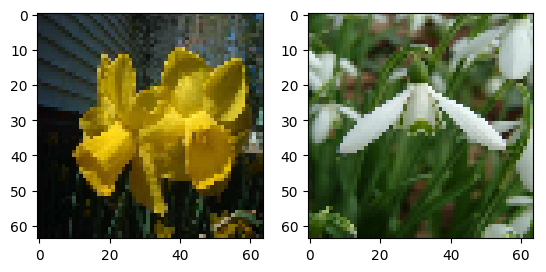

In [5]:
plt.subplot(1,2,1)
img = load_img("image/Daffodil/image_0020.jpg",target_size=(64,64))
x = img_to_array(img)/255.
plt.imshow(x)

plt.subplot(1,2,2)
img = load_img("image/Snowdrop/image_0082.jpg",target_size=(64,64))
x = img_to_array(img)/255.
plt.imshow(x)
plt.show()

### Load everything into memory

In [0]:
x = []
y = []
labels = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']

for i,label in enumerate(labels):
    folder = os.path.join("image",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        img_path = os.path.join(folder,file)
        img = load_img(img_path,target_size=(64,64))
        img = img_to_array(img)/255.
        x.append(x)
        y.append(i)

x = np.array(x)
y = np.array(y)       
y = to_categorical(y)
y = to_categorical(y)


train_x, valid_x, train_y, valid_y = train_test_split(x,y,random_state=1,test_size=0.2)

print(train_x.shape,train_y.shape)
print(valid_x.shape,valid_y.shape)

## *de novo* CNN training

In [0]:
#VGG16 architecture with batchnormalization and dropout
model = Sequential([
    #feature extraction layer
    
    #block1
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    #block2
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    #block3
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),

    #block4
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block4_pool"),

    #block5
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block5_pool"),

    layers.Flatten(),
    
    #inference layer
    layers.Dense(512,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(512,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    layers.Dropout(0.5),
    
    layers.Dense(17,name="prepredictions"),
    layers.Activation("softmax",name="predictions")
    
])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization_226 (Bat (None, 64, 64, 64)        256       
_________________________________________________________________
activation_226 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_227 (Bat (None, 64, 64, 64)        256       
_________________________________________________________________
activation_227 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
__________

In [104]:
history = model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=60, epochs=50)

Train on 1020 samples, validate on 170 samples
Epoch 1/50
1020/1020 [==============================] - 20s 20ms/step - loss: 3.0920 - acc: 0.0941 - val_loss: 14.3389 - val_acc: 0.0588
Epoch 2/50
1020/1020 [==============================] - 4s 4ms/step - loss: 2.6650 - acc: 0.1765 - val_loss: 10.0393 - val_acc: 0.0706
Epoch 3/50
1020/1020 [==============================] - 4s 4ms/step - loss: 2.4722 - acc: 0.1931 - val_loss: 7.4040 - val_acc: 0.1412
Epoch 4/50
1020/1020 [==============================] - 4s 4ms/step - loss: 2.2577 - acc: 0.2176 - val_loss: 3.3514 - val_acc: 0.1529
Epoch 5/50
1020/1020 [==============================] - 4s 4ms/step - loss: 2.1036 - acc: 0.2833 - val_loss: 3.7209 - val_acc: 0.1000
Epoch 6/50
1020/1020 [==============================] - 4s 4ms/step - loss: 1.9705 - acc: 0.3167 - val_loss: 2.4460 - val_acc: 0.1588
Epoch 7/50
1020/1020 [==============================] - 4s 4ms/step - loss: 1.8587 - acc: 0.3510 - val_loss: 3.2826 - val_acc: 0.2471
Epoch 8/50


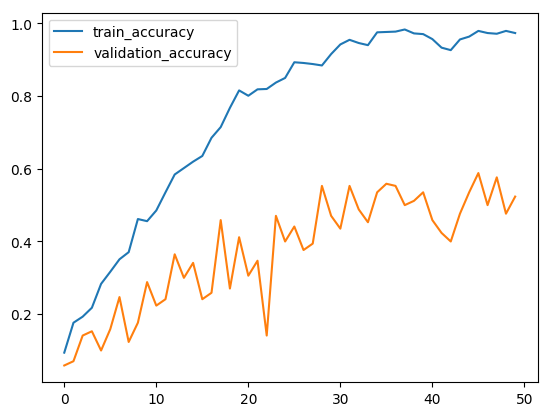

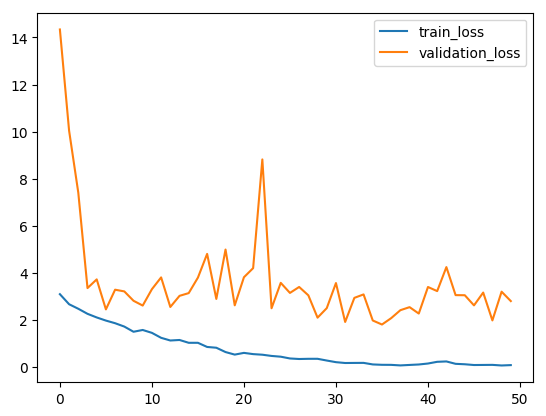

In [105]:
plt.plot(history.history["acc"],label="train_accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()

## Transfer Learning

In [119]:
#read the imagenet pretrained VGG16 without the dense layers
core = VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False)

#add the dense layers by functional api
x = layers.Flatten()(core.output)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(17)(x)
outputs = layers.Activation("softmax")(x)

#compile model
model = Model(inputs=core.input,outputs=outputs)

#freeze the core model layer
for layer in core.layers:
    layer.trainable = False
    
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["acc"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [120]:
history2 = model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=60, epochs=50)

Train on 1020 samples, validate on 170 samples
Epoch 1/50
1020/1020 [==============================] - 15s 14ms/step - loss: 2.7086 - acc: 0.1441 - val_loss: 2.3493 - val_acc: 0.3412
Epoch 2/50
1020/1020 [==============================] - 1s 1ms/step - loss: 1.9867 - acc: 0.3578 - val_loss: 2.0746 - val_acc: 0.4000
Epoch 3/50
1020/1020 [==============================] - 1s 1ms/step - loss: 1.5923 - acc: 0.4843 - val_loss: 1.8131 - val_acc: 0.4471
Epoch 4/50
1020/1020 [==============================] - 1s 1ms/step - loss: 1.2832 - acc: 0.5657 - val_loss: 1.7085 - val_acc: 0.4824
Epoch 5/50
1020/1020 [==============================] - 1s 1ms/step - loss: 1.0818 - acc: 0.6627 - val_loss: 1.6044 - val_acc: 0.4882
Epoch 6/50
1020/1020 [==============================] - 1s 1ms/step - loss: 0.9084 - acc: 0.7000 - val_loss: 1.6144 - val_acc: 0.5118
Epoch 7/50
1020/1020 [==============================] - 1s 1ms/step - loss: 0.8222 - acc: 0.7284 - val_loss: 1.5170 - val_acc: 0.5647
Epoch 8/50
10

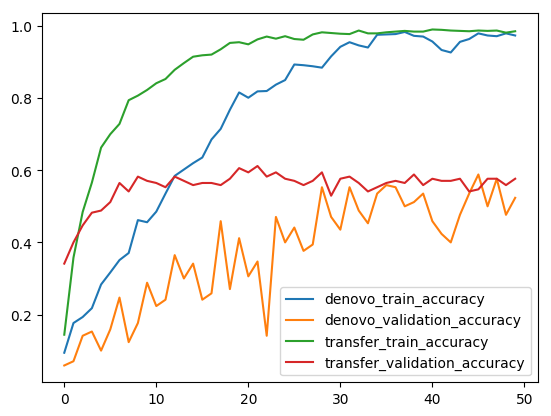

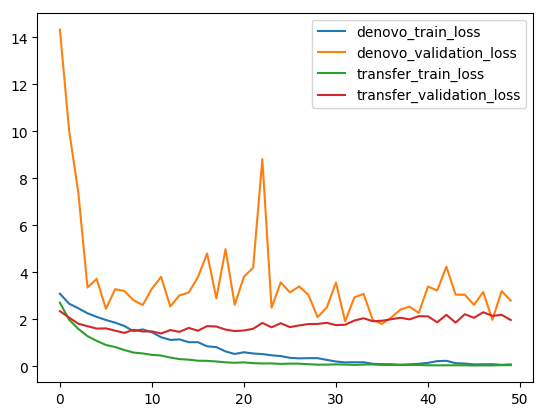

In [121]:
plt.plot(history.history["acc"],label="denovo_train_accuracy")
plt.plot(history.history["val_acc"],label="denovo_validation_accuracy")
plt.plot(history2.history["acc"],label="transfer_train_accuracy")
plt.plot(history2.history["val_acc"],label="transfer_validation_accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="denovo_train_loss")
plt.plot(history.history["val_loss"],label="denovo_validation_loss")
plt.plot(history2.history["loss"],label="transfer_train_loss")
plt.plot(history2.history["val_loss"],label="transfer_validation_loss")
plt.legend()
plt.show()


## Fine Tuning

In [123]:
#read the imagenet pretrained VGG16 without the dense layers
core = VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False)

#add the dense layers by functional api
x = layers.Flatten()(core.output)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(17)(x)
outputs = layers.Activation("softmax")(x)

#compile model
model = Model(inputs=core.input,outputs=outputs)

#freeze the core model layer
for layer in core.layers:
    layer.trainable = False
    
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=["acc"])
model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=60, epochs=2)

#fine tune the entire model
for layer in core.layers:
    layer.trainable=True
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.SGD(0.0001,momentum=0.1), metrics=["acc"])

history3 = model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=60, epochs=50)

Train on 1020 samples, validate on 170 samples
Epoch 1/2
1020/1020 [==============================] - 15s 15ms/step - loss: 2.6102 - acc: 0.2029 - val_loss: 2.2159 - val_acc: 0.3059
Epoch 2/2
1020/1020 [==============================] - 1s 1ms/step - loss: 1.9142 - acc: 0.3814 - val_loss: 1.9932 - val_acc: 0.4000
Train on 1020 samples, validate on 170 samples
Epoch 1/50
1020/1020 [==============================] - 17s 17ms/step - loss: 1.5070 - acc: 0.5196 - val_loss: 1.9137 - val_acc: 0.4176
Epoch 2/50
1020/1020 [==============================] - 3s 3ms/step - loss: 1.4533 - acc: 0.5500 - val_loss: 1.8784 - val_acc: 0.4294
Epoch 3/50
1020/1020 [==============================] - 3s 3ms/step - loss: 1.4468 - acc: 0.5343 - val_loss: 1.8370 - val_acc: 0.4235
Epoch 4/50
1020/1020 [==============================] - 3s 3ms/step - loss: 1.4259 - acc: 0.5431 - val_loss: 1.8245 - val_acc: 0.4294
Epoch 5/50
1020/1020 [==============================] - 3s 3ms/step - loss: 1.4054 - acc: 0.5559 - v

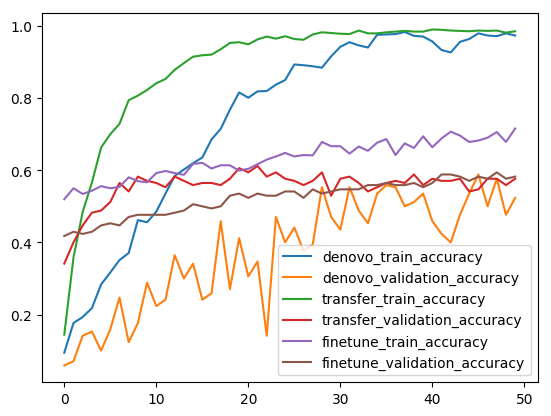

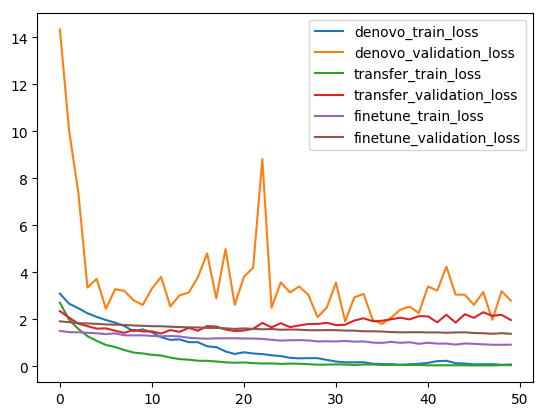

In [124]:
plt.plot(history.history["acc"],label="denovo_train_accuracy")
plt.plot(history.history["val_acc"],label="denovo_validation_accuracy")
plt.plot(history2.history["acc"],label="transfer_train_accuracy")
plt.plot(history2.history["val_acc"],label="transfer_validation_accuracy")
plt.plot(history3.history["acc"],label="finetune_train_accuracy")
plt.plot(history3.history["val_acc"],label="finetune_validation_accuracy")

plt.legend()
plt.show()

plt.plot(history.history["loss"],label="denovo_train_loss")
plt.plot(history.history["val_loss"],label="denovo_validation_loss")
plt.plot(history2.history["loss"],label="transfer_train_loss")
plt.plot(history2.history["val_loss"],label="transfer_validation_loss")
plt.plot(history3.history["loss"],label="finetune_train_loss")
plt.plot(history3.history["val_loss"],label="finetune_validation_loss")

plt.legend()
plt.show()


# Postface

We can see that using the 17 flowers dataset, 